# Exercises for EBT617E - 2D Band structure

See Homework \#2

In [292]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [293]:
# define 2d BZ for a square lattice

Nk = 128
kk, dk = np.linspace(-np.pi, np.pi, Nk, endpoint=True, retstep=True)

In [294]:
# reciprocal lattice 

nmax = 2

dimx = 2*nmax+1

nn = np.arange(-nmax,nmax+1)

mGx, mGy = np.meshgrid(nn,nn)

In [295]:
mGx, mGy

(array([[-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2]]),
 array([[-2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2]]))

In [296]:
# let's enumerate states in the reciprocal state for each k: k + G

states = mGx+nmax + (mGy+nmax)*dimx

In [297]:
states

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [298]:
# k in [-pi,pi]
def ϵkG(kx,ky,Gx,Gy):
    return (kx+Gx)**2+(ky+Gy)**2

In [299]:
ϵkG(0,0,mGx,mGy)

array([[8, 5, 4, 5, 8],
       [5, 2, 1, 2, 5],
       [4, 1, 0, 1, 4],
       [5, 2, 1, 2, 5],
       [8, 5, 4, 5, 8]])

In [300]:
ϵkG(0,0,mGx,mGy).flatten()

array([8, 5, 4, 5, 8, 5, 2, 1, 2, 5, 4, 1, 0, 1, 4, 5, 2, 1, 2, 5, 8, 5,
       4, 5, 8])

In [301]:
# Let's do V(x,y) = Vm*( cos(2πx/a)/2 + cos(2πy/a) )

Vmax = 1

dF = 1
FCoeffs = np.zeros([2*dF+1,2*dF+1])

FCoeffs[-1+dF, 0+dF] = Vmax/2 
FCoeffs[ 0+dF, 0+dF] = 0
FCoeffs[ 1+dF, 0+dF] = Vmax/2

FCoeffs[ 0+dF,-1+dF] = Vmax 
FCoeffs[ 0+dF, 0+dF] = 0
FCoeffs[ 0+dF, 1+dF] = Vmax

In [302]:
FCoeffs

array([[0. , 0.5, 0. ],
       [1. , 0. , 1. ],
       [0. , 0.5, 0. ]])

In [303]:
for iFx, FCoeffx in enumerate(FCoeffs):
    for iFy, FCoeff in enumerate(FCoeffx):
        print(iFx,iFy,FCoeff)

0 0 0.0
0 1 0.5
0 2 0.0
1 0 1.0
1 1 0.0
1 2 1.0
2 0 0.0
2 1 0.5
2 2 0.0


In [334]:
# let's plot this potential in real space

Nx = 101
xmax = 1.5
xx = np.linspace(-xmax,xmax,Nx,endpoint=True)
mx, my = np.meshgrid(xx,xx)

nF = np.arange(-dF,dF+1)

mGFx, mGFy = np.meshgrid(nF,nF)

expkR= np.exp( 1j * 2*np.pi * ( np.outer(mx,mGFx) + np.outer(my,mGFy) ) )

In [335]:
Vr = expkR@FCoeffs.flatten()

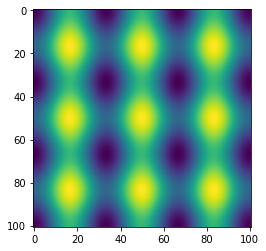

In [336]:
plt.imshow(Vr.real.reshape(Nx,Nx))

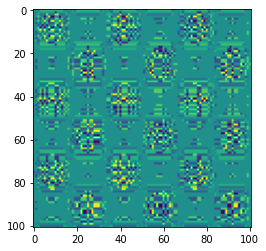

In [337]:
plt.imshow(Vr.imag.reshape(Nx,Nx))

In [304]:
def FMat(FCoeffs, nmax):
    dimx = 2*nmax+1
    dB = dimx*dimx
    MM = np.zeros([dB,dB])
    dimF = len(FCoeffs)
    dimFx  = (dimF-1)//2
    #print(dimFx,dimF)
    for iFx, FCoeffx in enumerate(FCoeffs):
        for iFy, FCoeff in enumerate(FCoeffx):
            index_shift = iFx-dimFx + (iFy-dimFx)*dimF 
            #print(iFx-dimFx,iFy-dimFx,FCoeff,index_shift)
            MM+=np.diag([FCoeff]*(dB-np.abs(index_shift)),index_shift)
    return MM # +MM.T


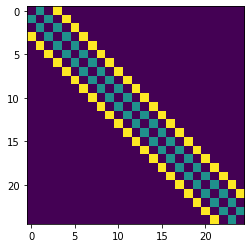

In [305]:
plt.imshow(FMat(FCoeffs, nmax))

In [306]:
VFMat = FMat(FCoeffs, nmax)

In [307]:
def Hband(kx,ky,nmax,VFMat):
    #dimx = 2*nmax+1
    #dB = dimx*dimx
    
    nn = np.arange(-nmax,nmax+1)
    mGx, mGy = np.meshgrid(nn,nn)
    
    HH = np.diag(ϵkG(kx,ky,mGx,mGy).flatten())
    HH+= VFMat
    return HH

In [308]:
kx=0.
ky=0.
Hb = Hband(kx,ky,nmax,VFMat)

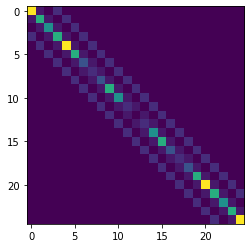

In [309]:
plt.imshow(Hb)

In [310]:
Ebands=[]
for ky in kk:
    Eband=[]
    for kx in kk:
        Hb = Hband(kx,ky,nmax,VFMat)
        ee, uu = np.linalg.eigh(Hb)
        Eband.append(ee)
    Ebands.append(Eband)
    
Ebands=np.array(Ebands)

In [311]:
Ebands.shape

(128, 128, 25)

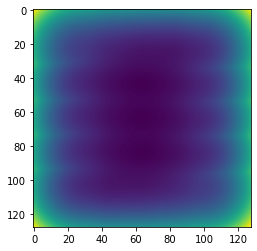

In [312]:
plt.imshow(Ebands[:,:,0])

In [313]:
from mpl_toolkits import mplot3d 

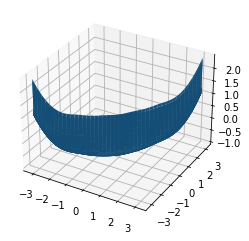

In [314]:
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
ax.plot_surface(kk,kk,Ebands[:,:,0])

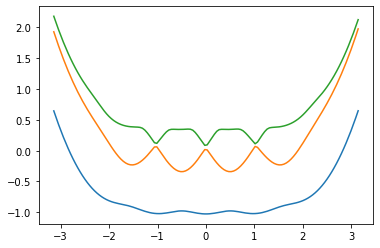

In [315]:
# plot the first few bands for ky=0
for ni,n in enumerate(nn[:3]):
    plt.plot(kk,Ebands[:,len(kk)//2,ni],'-')

In [338]:
# plot eigenfunction in real-space